<a href="https://colab.research.google.com/github/BrunoBerval/dio_project/blob/main/Projeto_Transfer_Learning_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Transfer Learning em Python

O objetivo principal deste projeto é construir um modelo de Transfer Learning baseado na rede neural pré-treinada VGG16 para classificar imagens de leões e tigres. Utilizamos o conceito de Transfer Learning para aproveitar os pesos da VGG16, previamente treinados no dataset ImageNet, transferindo esse conhecimento para nosso problema específico, reduzindo o tempo de treinamento e aumentando a precisão do modelo.

O dataset foi preparado com imagens organizadas em duas classes (lion e tiger), extraídas de um arquivo .zip. As imagens foram pré-processadas para se adequar ao formato esperado pela VGG16, com resolução ajustada para 224x224 pixels e normalizadas para valores entre 0 e 1.

Inicialmente, a última camada da VGG16 foi substituída por uma nova camada densa, adaptada para nosso problema de classificação binária. Durante o treinamento, apenas esta última camada foi ajustada, enquanto o restante da rede permaneceu congelado, preservando os pesos do treinamento anterior.

O modelo foi treinado, validado e testado utilizando splits de dados balanceados, garantindo uma análise justa de sua performance. Avaliações como loss (perda) e accuracy (acurácia) foram monitoradas para identificar melhorias durante o treinamento.

Com esse projeto, buscamos demonstrar o poder do Transfer Learning em aplicações práticas, especialmente em situações onde há dados limitados para treinar um modelo do zero. A solução pode ser estendida para outros problemas de classificação de imagens, consolidando o aprendizado sobre redes neurais convolucionais.


---



## Transfer Learning Project in Python



The main objective of this project is to build a Transfer Learning model based on the VGG16 pre-trained neural network to classify images of lions and tigers. We leverage the concept of Transfer Learning to utilize the weights of VGG16, previously trained on the ImageNet dataset, adapting this knowledge to our specific problem. This approach reduces training time and enhances model accuracy.

The dataset was prepared with images organized into two classes (lion and tiger), extracted from a .zip file. The images were preprocessed to match the format expected by VGG16, resized to 224x224 pixels, and normalized to values between 0 and 1.

Initially, the last layer of VGG16 was replaced with a new dense layer tailored to our binary classification problem. During the training phase, only this new layer was adjusted, while the rest of the network remained frozen to preserve the previously trained weights.

The model was trained, validated, and tested using balanced data splits, ensuring a fair evaluation of its performance. Metrics such as loss and accuracy were monitored to assess improvements during training.

This project demonstrates the power of Transfer Learning in practical applications, especially in situations where there is limited data to train a model from scratch. The solution can be extended to other image classification problems, providing a comprehensive learning experience with convolutional neural networks.



**%matplotlib inline:** Configura o ambiente para exibir gráficos diretamente no notebook.

**Importações:** Incluem bibliotecas essenciais para manipulação de arquivos, números aleatórios, arrays numéricos, e a biblioteca Keras, usada para construir e treinar modelos de aprendizado profundo.

**preprocess_input e image:** Funções do Keras para pré-processar e carregar imagens no formato adequado para redes neurais.

**Model e Dense:** Construção de redes neurais e adição de camadas densas personalizadas.

**to_categorical:** Converte rótulos (labels) em vetores one-hot, adequados para classificação.


---
**%matplotlib inline:** Configures the environment to display plots directly in the notebook.

**Imports:** Include essential libraries for file handling, random number generation, numerical arrays, and Keras, used to build and train deep learning models.

**preprocess_input and image:** Functions from Keras to preprocess and load images in the proper format for neural networks.

**Model and Dense:** Used to build neural networks and add custom dense layers.

**to_categorical:** Converts labels into one-hot vectors, suitable for classification tasks.


In [1]:
%matplotlib inline

import os
import random
import numpy as np
import keras
import zipfile
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model
from keras.layers import Dense
from keras.utils import to_categorical

Extrair todos os arquivos de images_bruno.zip para a pasta images_bruno.



---

Extracts all files from images_bruno.zip into the folder images_bruno.

In [2]:
# Descompactar o arquivo .zip
zip_path = 'images_bruno.zip'  # Caminho do arquivo .zip
extract_path = 'images_bruno'  # Pasta de destino

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

Define o diretório raiz root onde as imagens estão armazenadas, e as categorias de classificação (tiger e lion). Também define as proporções para dividir os dados em treinamento (70%) e validação (15%).

Função get_image: Carrega uma imagem a partir do caminho fornecido, redimensiona para 224x224 pixels, converte a imagem em um array NumPy, e aplica o pré-processamento necessário para a rede neural.



---
Defines the root directory root where the images are stored, and the classification categories (tiger and lion). It also sets the proportions to split the data into training (70%) and validation (15%).]

get_image Function: Loads an image from the given path, resizes it to 224x224 pixels, converts the image to a NumPy array, and applies the necessary preprocessing for the neural network.


In [3]:
# Diretórios das imagens
root = 'images_bruno'
categories = ['tiger', 'lion']
train_split, val_split = 0.7, 0.15

# Função auxiliar para carregar imagem e vetor de entrada
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Carregar as imagens de cada categoria, as prepara convertendo-as em um array e as armazena na lista data com seus rótulos. Depois, conta o número de categorias (classes).


---


Load images from each category, prepares them by converting them into an array, and stores them in the data list along with their labels. It then counts the number of categories (classes).

In [4]:
# Carregar imagens e preparar os dados
data = []
for c, category in enumerate(categories):
    category_path = os.path.join(root, category)
    images = [os.path.join(dp, f) for dp, _, filenames in os.walk(category_path) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    for img_path in images:
        _, x = get_image(img_path)
        data.append({'x': np.array(x[0]), 'y': c})

# Contagem das classes
num_classes = len(categories)

O código abaixo embaralha os dados e os divide em conjuntos de treinamento, validação e teste. Normaliza os dados de imagem escalando os valores dos pixels para o intervalo de 0 a 1. Também converte os rótulos para o formato one-hot encoding. Os conjuntos de treinamento, validação e teste são então separados em arrays de características (x_train, x_val, x_test) e rótulos correspondentes (y_train, y_val, y_test).



---
The code below shuffles the data, then splits it into training, validation, and test sets. It normalizes the image data by scaling pixel values to a range of 0-1. It also converts the labels into one-hot encoding format. The training, validation, and test sets are then separated into feature arrays (x_train, x_val, x_test) and corresponding labels (y_train, y_val, y_test).


In [5]:
# Embaralhar e dividir os dados
random.shuffle(data)
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]

# Normalizar os dados
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Converter os rótulos para one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

Imprimir o número total de imagens carregadas, o número de categorias, a divisão dos dados em conjuntos de treinamento, validação e teste, e o formato dos dados e rótulos de treinamento.



---
Print the total number of images loaded, the number of categories, the split of data into training, validation, and test sets, and the shape of the training data and labels.


In [6]:
# Resumo dos dados
print(f"Imagens carregadas: {len(data)} em {num_classes} categorias")
print(f"Divisão treino/validação/teste: {len(x_train)}, {len(x_val)}, {len(x_test)}")
print(f"Shape dos dados de treino: {x_train.shape}, rótulos: {y_train.shape}")

Imagens carregadas: 422 em 2 categorias
Divisão treino/validação/teste: 295, 63, 64
Shape dos dados de treino: (295, 224, 224, 3), rótulos: (295, 2)


Carrega uma imagem de cada categoria, redimensiona para 224x224 pixels e as concatena horizontalmente. Em seguida, exibe a imagem concatenada usando matplotlib, com os eixos desativados.



---
Loads one image from each category, resizes it to 224x224 pixels, and concatenates them horizontally. It then displays the concatenated image using matplotlib, with the axes turned off.


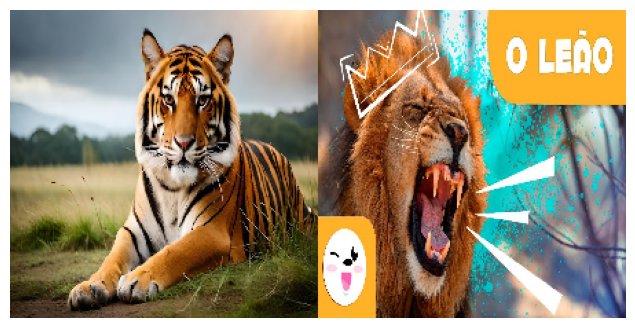

In [7]:
# Visualizar algumas imagens
images = [image.load_img(f"{root}/{categories[i]}/{os.listdir(root + '/' + categories[i])[0]}", target_size=(224, 224)) for i in range(len(categories))]
concat_image = np.concatenate([np.asarray(img) for img in images], axis=1)
plt.figure(figsize=(16, 4))
plt.imshow(concat_image)
plt.axis('off')
plt.show()

A célula de código abaixo carrega o modelo pré-treinado VGG16 da biblioteca Keras. O modelo é uma rede neural convolucional profunda, muito utilizada para tarefas de classificação de imagens. Vamos detalhar os parâmetros usados:

weights='imagenet': Especifica que os pesos da rede serão os pesos já treinados no conjunto de dados ImageNet. ImageNet é um grande banco de dados de imagens com milhões de imagens de objetos classificados em milhares de categorias.

include_top=True: Significa que a parte final (topo) da rede, que consiste em camadas totalmente conectadas e a camada de saída, será incluída no modelo. Isso permite que o modelo faça classificações diretamente. Se fosse False, a parte final seria removida e o modelo seria usado como uma rede de características para transfer learning.



---
The code cell below loads the pre-trained VGG16 model from the Keras library. VGG16 is a deep convolutional neural network commonly used for image classification tasks. Here's a breakdown of the parameters used:

weights='imagenet': Specifies that the model will use weights pre-trained on the ImageNet dataset, a large collection of labeled images used for training.

include_top=True: Means the final layers (the top) of the network, which consist of fully connected layers and the output layer, are included. This allows the model to perform classification directly. If it were set to False, the final layers would be removed, and the model would be used as a feature extractor for transfer learning.


In [8]:
# Carregar VGG16
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Cria um novo modelo baseado na VGG16, adicionando uma camada de classificação personalizada e congelando todas as camadas, exceto a última.


---
Creates a new model based on VGG16 by adding a custom classification layer and freezing all layers except the last one.


In [9]:
# Congelar camadas menos a última
inp = vgg.input
new_classification_layer = Dense(num_classes, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_new = Model(inp, out)

for layer in model_new.layers[:-1]:
    layer.trainable = False

model_new.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model_new.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

O código treina o modelo model_new usando os dados de treinamento (x_train, y_train) e validação (x_val, y_val). Ele define o tamanho do lote para 32 e o número de épocas para 10, ou seja, o modelo passará pelos dados de treinamento 10 vezes.



---
The code trains the model_new using the training (x_train, y_train) and validation (x_val, y_val) data. It sets the batch size to 32 and the number of epochs to 10, meaning the model will go through the training data 10 times.


In [12]:
# Treinar modelo
history = model_new.fit(x_train, y_train,
                        batch_size=32,
                        epochs=10,
                        validation_data=(x_val, y_val))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 220s 22s/step - accuracy: 0.9738 - loss: 0.1591 - val_accuracy: 0.9365 - val_loss: 0.1908
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 276s 23s/step - accuracy: 0.9623 - loss: 0.1493 - val_accuracy: 0.9048 - val_loss: 0.2072
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 223s 23s/step - accuracy: 0.9694 - loss: 0.1416 - val_accuracy: 0.9206 - val_loss: 0.1909
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 262s 23s/step - accuracy: 0.9753 - loss: 0.1414 - val_accuracy: 0.9365 - val_loss: 0.1751
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 267s 23s/step - accuracy: 0.9710 - loss: 0.1349 - val_accuracy: 0.9206 - val_loss: 0.1777
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 258s 23s/step - accuracy: 0.9853 - loss: 0.1105 - val_accuracy: 0.9206 - val_loss: 0.1733
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 260s 23s/step - accuracy: 0.9684 - loss: 0.1096 - val_accuracy: 0.9206 - val_loss: 0.1603
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 262s 23s/step - accuracy: 0.9861 - loss: 0.1012 - val_accuracy: 0.

Avalia o desempenho do modelo model_new nos dados de teste (x_test, y_test). Ele calcula a perda e a precisão, e imprime os resultados com 4 casas decimais.



---

Evaluates the performance of the model_new on the test data (x_test, y_test). It calculates the loss and accuracy, and prints the results with 4 decimal places.

In [13]:
# Avaliação
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 0.1551
Test accuracy: 0.9375


Para finalizar, a célula abaixo realiza a predição de uma nova imagem após descompactar o arquivo .zip contendo as amostras. Ele carrega a imagem (sample1.jpg ou sample2.jpg), aplica o modelo treinado (model_new) para prever a classe da imagem, e exibe a imagem com o título da classe prevista.


---


To finish, the cell below makes a prediction on a new image after extracting the .zip file containing the samples. It loads the image (sample1.jpg or sample2.jpg), applies the trained model (model_new) to predict the image's class, and displays the image with the predicted class as the title.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


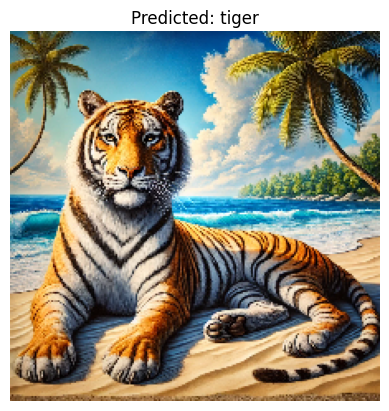

In [14]:
# Predição em nova imagem
# Descompactar o arquivo .zip
zip_path = 'samples.zip'  # Caminho do arquivo .zip
extract_path = 'samples'  # Pasta de destino

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()


img_path = 'samples/sample1.jpg'
img, x = get_image(img_path)
probabilities = model_new.predict(x)
predicted_class = categories[np.argmax(probabilities)]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


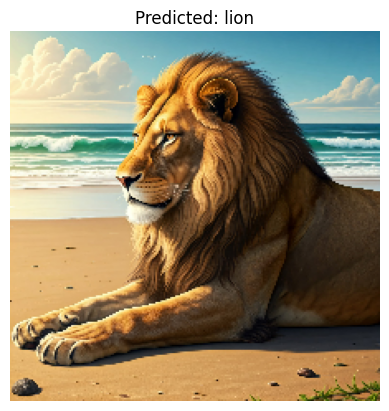

In [15]:
img_path = 'samples/sample2.jpg'
img, x = get_image(img_path)
probabilities = model_new.predict(x)
predicted_class = categories[np.argmax(probabilities)]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()